## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
breast_cancer = datasets.load_breast_cancer()
wine = datasets.load_wine()
boston = datasets.load_boston()

# Logistic Regression - Breast cancer

In [31]:
train_x, test_x, train_y, test_y= train_test_split(breast_cancer.data, breast_cancer.target, train_size=0.3)
LR=linear_model.LogisticRegression()
h=LR.fit(train_x,train_y)
y_h=LR.predict(test_x)
acc=accuracy_score(y_h, test_y)
print('accuracy={}'.format(acc))

accuracy=0.9448621553884712


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


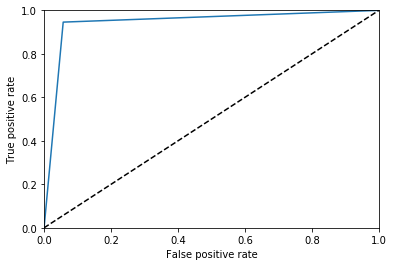

roc_auc_score=0.944


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr,thershold= roc_curve(y_h, test_y)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
print('roc_auc_score={:.3f}'.format(roc_auc_score(y_h,test_y)))

# Linear Regression

## 所有的參數進行 linear regression

In [74]:
import pandas as pd
boston_house=pd.DataFrame(boston.data, columns=boston.feature_names)
price=pd.DataFrame(boston.target, columns=['PRICE'])
train_x, test_x, train_y, test_y= train_test_split(boston_house, price, train_size=0.3)
LR=linear_model.LinearRegression()
LR.fit(train_x, train_y)
y_h=LR.predict(test_x)

In [75]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
r2=metrics.r2_score(y_h, test_y)
cross_score=cross_val_score(LR, boston_house,price, cv=5).mean()
print('r2={:.3f}'.format(r2))
print('cv_score={:.3f}'.format(cross_score))

r2=0.467
cv_score=0.353


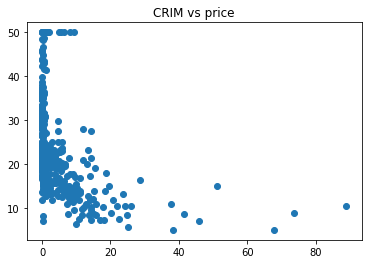

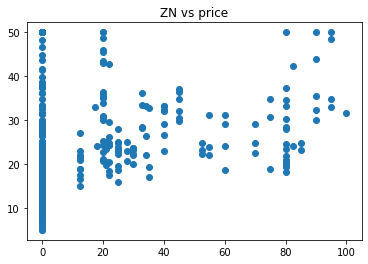

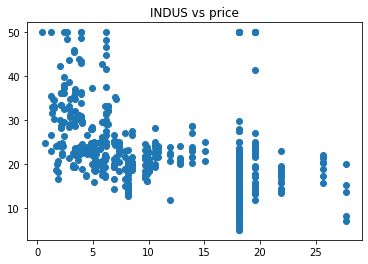

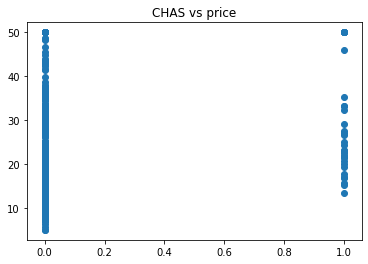

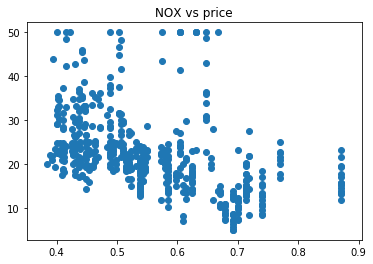

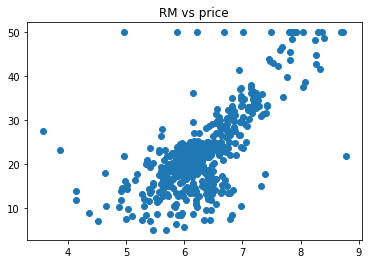

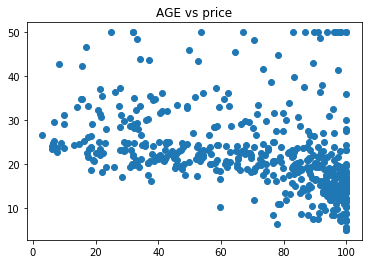

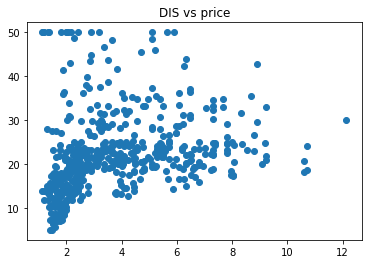

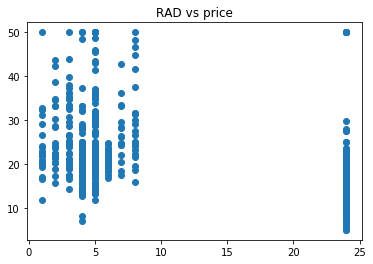

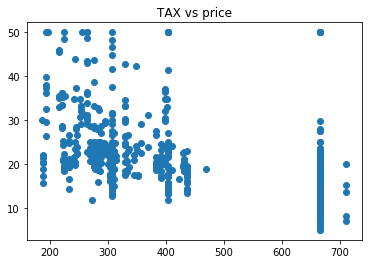

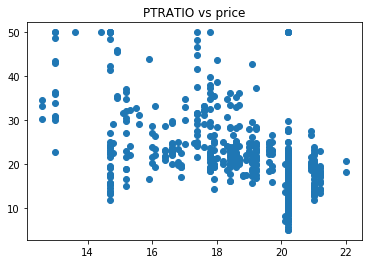

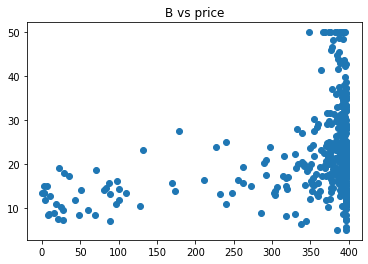

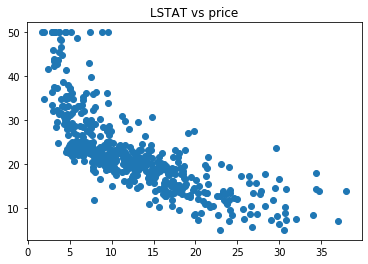

In [81]:
for c in boston_house.columns:
    plt.scatter(boston_house[c], price)
    plt.title('{} vs price'.format(c))
    plt.show()

## 挑選RM進行回歸

In [119]:
from sklearn.preprocessing import PolynomialFeatures
RM=pd.DataFrame(boston_house['RM'])
train_x, test_x, train_y, test_y= train_test_split(RM, price, train_size=0.3)
LR=linear_model.LinearRegression()
LR.fit(train_x, train_y)
y_h=LR.predict(test_x)

In [120]:
r2=metrics.r2_score(y_h, test_y)
cross_score=cross_val_score(LR, boston_house,price, cv=5).mean()
print('r2={:.3f}'.format(r2))
print('cv_score={:.3f}'.format(cross_score))

r2=-0.207
cv_score=0.353


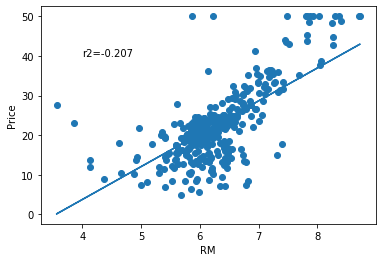

In [127]:
plt.scatter(test_x,test_y)
plt.plot(test_x, y_h)
plt.xlabel('RM')
plt.ylabel('Price')
plt.text(4,40,'r2={:.3f}'.format(r2))
plt.show()